# Exploratory Data Analysis (EDA) -- Inferential Statistics

Questions:

1. What is the probability that mean prices are similar for wines from different regions and countries.

2. What is the correlation between price and rating?

These questions can be answered by using **Student's T-Test** and the **Pearson correlation coefficient**.

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
winedata = pd.read_csv("cleaned_wine_data.csv")
winedata = winedata.drop('Unnamed: 0', 1)
winedata.head()

,country,description,designation,points,price,region,sub_region,taster_name,taster_twitter_handle,title,variety,winery
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [23]:
frenchwines = winedata[winedata['country'] == 'France'].reset_index()
italianwines = winedata[winedata['country'] == 'Italy'].reset_index()
uswines = winedata[winedata['country'] == 'US'].reset_index()
caliwines = uswines[uswines['region'] == 'California']

## Two Sample T-Test

Student's T-test looks at the differences between two means to determine the level of significance of their difference.  A Two Sample T-Test can be used when the means of the two samples being considered are not connected to each other. 

$t = \frac{\bar{X}_1 - \bar{X}_2}{s_p \sqrt\frac{2}{n}}$ where $s_p = \sqrt{\frac{s_{X_1}^2+s_{X_2}^2}{2}}$

In [1]:
from scipy.stats import ttest_ind

### French Wines

Visualizations indicated that wines from the Champagne and Burgundy regions of France on average were higher priced than wines from other regions of France.  The T-test is used on these regions versus other regions in France. 

In [37]:
champagneandburgundy = frenchwines[(frenchwines['region']=='Burgundy') | (frenchwines['region']=='Champagne')]
otherfrenchregions = frenchwines[(frenchwines['region']!='Burgundy') & (frenchwines['region']!='Champagne')]
ttest_ind(champagneandburgundy['price'], otherfrenchregions['price'])

Ttest_indResult(statistic=35.32778806213724, pvalue=2.81022777051498e-264)

The low p-value indicates that the discrepancy between average price of wines from the Champagne and Burgundy regions as opposed to other regions in France is not coincidental. 

### Italian Wines

The T-test is used on wines from Piedmont and Tuscany (which visualizations indicated were more expensive) and other regions in Italy.

In [38]:
piedmontandtuscany = italianwines[(italianwines['region']=='Piedmont') | (italianwines['region']=='Tuscany')]
otheritalianregions = italianwines[(italianwines['region']!='Piedmont') & (italianwines['region']!='Tuscany')]
ttest_ind(piedmontandtuscany['price'], otheritalianregions['price'])

Ttest_indResult(statistic=37.15516314840329, pvalue=1.5242090390417913e-290)

The low p-value indicates that the difference in averages is not coincidental. 

### California Wines

The T-test is used on wines from Napa Valley, Sonoma Coast and Sta. Rita Hills (which visualizations indicated were more expensive) and other regions in California.

In [36]:
napasonomastarita = caliwines[(caliwines['sub_region']=='Napa Valley') | (caliwines['sub_region']=='Sonoma Coast') | (caliwines['sub_region']=='Sta. Rita Hills')]
othercaliregions = caliwines[(caliwines['sub_region']!='Napa Valley') & (caliwines['sub_region']!='Sonoma Coast') & (caliwines['sub_region']!='Sta. Rita Hills')]
ttest_ind(napasonomastarita['price'], othercaliregions['price'])

Ttest_indResult(statistic=41.221474432324115, pvalue=0.0)

Again, the low p-value indicates that the difference in averages is not coincidental. 

## Pearson correlation coefficient.

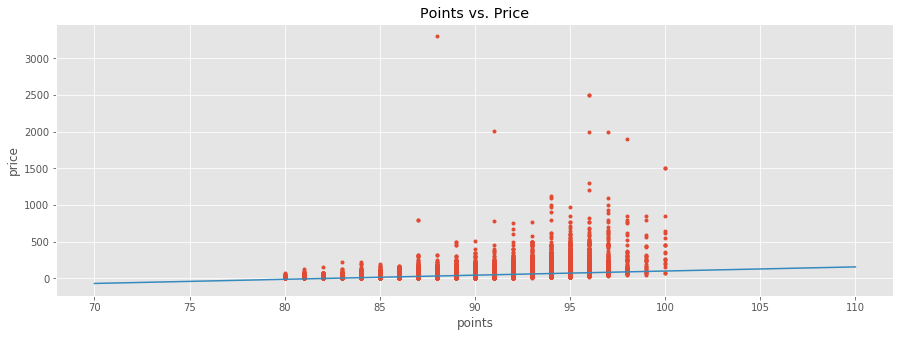

In [40]:
points = winedata['points']
price = winedata['price']

plt.figure(figsize=(15, 5))
plt.plot(points, price,  marker='.', linestyle='none')
_ = plt.xlabel('points')
_ = plt.ylabel('price')
_ = plt.title("Points vs. Price")
a, b = np.polyfit(points, price, 1)
x = np.array([70,110])
y = a * x +  b
_ = plt.plot(x, y)



The line shows a positive correlation.  Calculating the Pearson correlation coefficient can further indicate the positive relationship between points and price in the entire dataset.

In [43]:
all_data_corr_mat = np.corrcoef(points, price)
print (all_data_corr_mat[0,1])


0.4170139701452048


The correlation coefficient can also be calculated for individual subgroups that one wants to consider in the dataset, in this case, French, Italian, and Californian wines.

In [44]:
french_corr_mat = np.corrcoef(frenchwines['points'], frenchwines['price'])
print (french_corr_mat[0,1])


0.4058294023943131


In [45]:
italian_corr_mat = np.corrcoef(italianwines['points'], italianwines['price'])
print (italian_corr_mat[0,1])

0.5280726946460933


In [46]:
cali_corr_mat = np.corrcoef(caliwines['points'], caliwines['price'])
print (cali_corr_mat[0,1])

0.44274738612470926


The previous lines show that for wines from all of the subgroups, price was positively associated with points given by raters; for Italian wines, this relationship was somewhat more pronounced.